Introduction to the Earthquake and Tsunami Dataset

The Earthquake and Tsunami dataset is a comprehensive collection of seismic event data, primarily focused on understanding the relationship between earthquakes and tsunami occurrences. It provides valuable insights into the patterns, magnitudes, locations, and impacts of earthquakes that have occurred globally over a given period. Researchers and data scientists use this dataset to analyze the geophysical factors that contribute to tsunami generation and to develop predictive models for disaster risk management
This dataset is particularly valuable for geoscientists, researchers, and data analysts who aim to identify patterns and correlations between earthquake intensity, depth, and the likelihood of a tsunami. By applying data analytics and machine learning techniques, it becomes possible to build predictive models that can help forecast tsunami occurrences based on seismic parameters. Furthermore, this dataset supports visual and statistical analysis of earthquake distributions across different regions, magnitudes, and time periods.

The insights derived from this data can play a crucial role in improving disaster preparedness and early warning systems. Understanding how certain seismic characteristics influence tsunami formation helps in minimizing loss of life and property damage in coastal regions. Overall, the Earthquake and Tsunami dataset contributes significantly to the study of earth science and risk management, enabling a deeper understanding of how natural forces interact and impact human societies

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [31]:
df=pd.read_csv(r"C:\datascience\project\machine leaarning 3\earthquake_data_tsunami.csv")
print("first 5 row")
print(df.head())
print("last 5 row")
print(df.tail())

first 5 row
   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  
last 5 row
     magnitude  cdi  mmi  sig  nst  dmin  gap  depth  latitude  longitude  \
777        7.7    0    8  912  427   0.0  0.0   60.0   13.0490    -88.660   
778        6.9    5    7  745    0   0.0  0.0   36.4   56.7744   -153.281   
779        7.1    0    7  776  372   0.0  0.0  103.0  -14.9280    167.170   
780        6.8    0    5  711   64   0

In [32]:
#data cleaning
df.isna().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'magnitude'),
  Text(1, 0, 'cdi'),
  Text(2, 0, 'mmi'),
  Text(3, 0, 'sig'),
  Text(4, 0, 'nst'),
  Text(5, 0, 'dmin'),
  Text(6, 0, 'gap'),
  Text(7, 0, 'depth'),
  Text(8, 0, 'latitude'),
  Text(9, 0, 'longitude'),
  Text(10, 0, 'Year'),
  Text(11, 0, 'Month'),
  Text(12, 0, 'tsunami')])

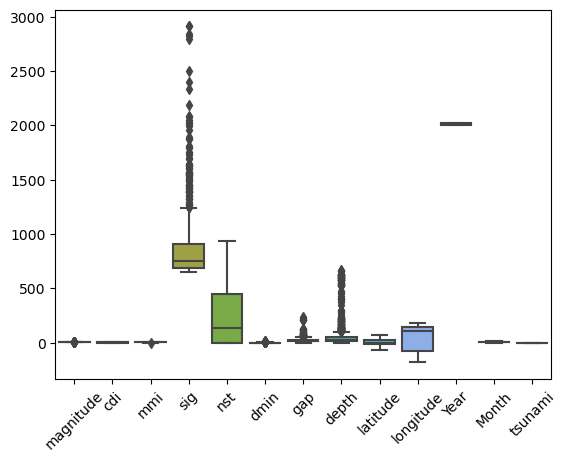

In [33]:
sns.boxplot(df)
plt.xticks(rotation=45)

In [34]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print("Data after removing outliers:\n", df.head())

Data after removing outliers:
     magnitude  cdi  mmi  sig  nst   dmin   gap  depth  latitude  longitude  \
0         7.0    8    7  768  117  0.509  17.0   14.0   -9.7963   159.5960   
1         6.9    4    4  735   99  2.229  34.0   25.0   -4.9559   100.7380   
7         6.7    7    6  797  145  1.151  37.0   20.0    7.6712   -82.3396   
10        6.9    9    9  887  215  0.401  34.0   10.0   23.1444   121.3070   
13        7.6    8    8  965  272  3.158  12.0  116.0   -6.2237   146.4710   

    Year  Month  tsunami  
0   2022     11        1  
1   2022     11        0  
7   2022     10        1  
10  2022      9        1  
13  2022      9        1  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'magnitude'),
  Text(1, 0, 'cdi'),
  Text(2, 0, 'mmi'),
  Text(3, 0, 'sig'),
  Text(4, 0, 'nst'),
  Text(5, 0, 'dmin'),
  Text(6, 0, 'gap'),
  Text(7, 0, 'depth'),
  Text(8, 0, 'latitude'),
  Text(9, 0, 'longitude'),
  Text(10, 0, 'Year'),
  Text(11, 0, 'Month'),
  Text(12, 0, 'tsunami')])

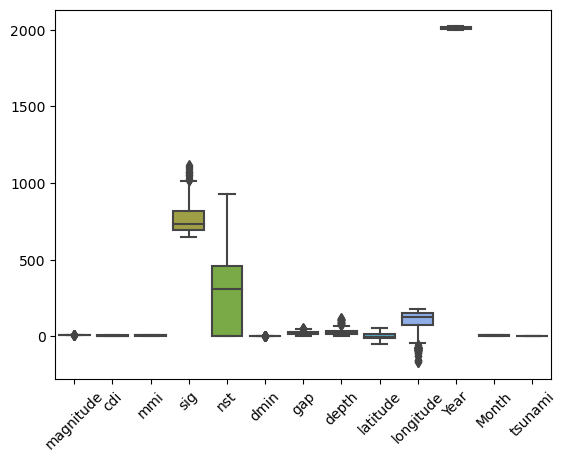

In [35]:
sns.boxplot(df)
plt.xticks(rotation=45)

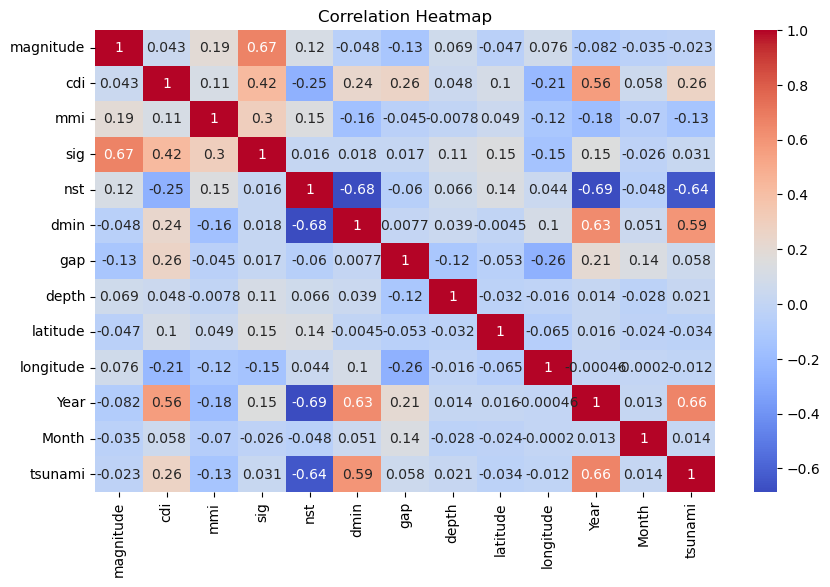

In [36]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [37]:
x=df[['nst','dmin','Year',]]
y=df[['tsunami']]

In [38]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter= 1000)
# fitting model with data
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

c:\Users\ruksana\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
#Evaluating the Algorithm
from sklearn import metrics
print(metrics.mean_absolute_error)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred) ))
print("Accuracy:", metrics. accuracy_score(y_test, y_pred))

<function mean_absolute_error at 0x000001DAEA1D1870>
Mean Squared Error: 0.07692307692307693
Root Mean Squared Error: 0.2773500981126146
Accuracy: 0.9230769230769231


using randomforest


In [43]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)
x_test= st_x. transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)

#Predicting the test set result
y_pred= classifier.predict(x_test)
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred) )
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred) )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Mean Absolute Error: 0.15384615384615385
Mean Squared Error: 0.15384615384615385
Root Mean Squared Error: 0.3922322702763681
Accuracy: 84.62


C:\Users\ruksana\AppData\Local\Temp\ipykernel_8524\364104513.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)
